## Problem Statement

###### 1) Delivery_time -> Predict delivery time using sorting time 
2) Salary_hike -> Build a prediction model for Salary_hike

------------------------------------------------------------

Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.


In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf

In [2]:
# import dataset
dataset=pd.read_csv('C:\\Users\\Hp\\delivery_time.csv')
dataset


,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


###### EDA and Data Visualization

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


C:\Users\Hp\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

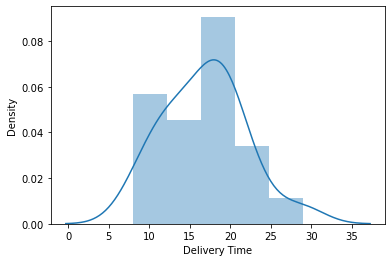

In [4]:
sns.distplot(dataset['Delivery Time'])

C:\Users\Hp\anaconda2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

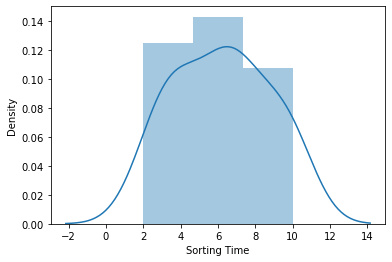

In [5]:
sns.distplot(dataset['Sorting Time'])

###### Feature Engineering

In [6]:
# Renaming Columns
dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
dataset


,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


###### Correlation Analysis

In [7]:
dataset.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

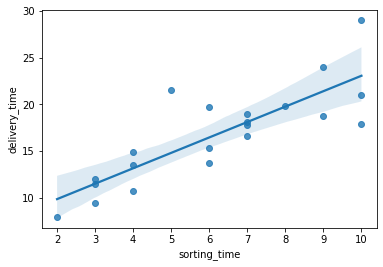

In [8]:
sns.regplot(x=dataset['sorting_time'],y=dataset['delivery_time'])

###### Model Building

In [9]:
model=smf.ols("delivery_time~sorting_time",data=dataset).fit()

###### Model Testing

In [10]:
# Finding Coefficient parameters
model.params


Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [13]:
# Finding tvalues and pvalues
model.tvalues , model.pvalues


(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [14]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj


(0.6822714748417231, 0.6655489208860244)

###### Feature Transformations and Scaling techniques

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline



In [16]:
df = pd.DataFrame({
    'Delivery Time': [21,13.5,19.75,24,29,15.35,19,9.5,17.9,18.75,19.83,10.75,16.68,11.5,12.03,14.88,13.75,18.11,8,17.83,21.5],
    'Sorting Time': [10,4,6,9,10,6,7,3,10,9,8,4,7,3,3,4,6,7,2,7,5]
})



In [17]:
df_scaled = df.copy()
col_names = ['Delivery Time', 'Sorting Time']
features = df_scaled[col_names]



In [18]:
#MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()



In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(5, 10))



In [20]:
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,Delivery Time,Sorting Time
0,8.095238,10.000
1,6.309524,6.250
2,7.797619,7.500
3,8.809524,9.375
4,10.000000,10.000
5,6.750000,7.500
6,7.619048,8.125
7,5.357143,5.625
8,7.357143,10.000
9,7.559524,9.375


In [21]:
#Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [22]:
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,Delivery Time,Sorting Time
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [23]:
df_scaled.describe()

,Delivery Time,Sorting Time
count,2.100000e+01,2.100000e+01
mean,-5.392512e-16,-7.137148e-17
std,1.024695e+00,1.024695e+00
min,-1.775019e+00,-1.689187e+00
25%,-6.644904e-01,-8.829842e-01
50%,2.097986e-01,-7.678123e-02
75%,5.974740e-01,7.294217e-01
max,2.465181e+00,1.535625e+00


In [24]:
#MaxAbs Scaler
df["Balance"] = [100.0, -263.0, 2000.0, -5.0,-60.0,300.0,-50.0,-3.0,-23.0,63.0,70.0,12.0,-34.0,-80.0,45.0,99.0,-32.0,-41.0,49.0,-59.0,-77.0]
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()


In [25]:
df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled



,Delivery Time,Sorting Time
0,0.724138,1.0
1,0.465517,0.4
2,0.681034,0.6
3,0.827586,0.9
4,1.000000,1.0
5,0.529310,0.6
6,0.655172,0.7
7,0.327586,0.3
8,0.617241,1.0
9,0.646552,0.9


In [26]:
df["Delivery Time"].max(), df["Sorting Time"].max(), df['Balance'].max()

(29.0, 10, 2000.0)

In [27]:

#Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,Delivery Time,Sorting Time
0,0.5072,1.00
1,-0.6928,-0.50
2,0.3072,0.00
3,0.9872,0.75
4,1.7872,1.00
5,-0.3968,0.00
6,0.1872,0.25
7,-1.3328,-0.75
8,0.0112,1.00
9,0.1472,0.75


In [28]:
#Quantile Transformer Scaler
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer()

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


C:\Users\Hp\anaconda2\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (21). n_quantiles is set to n_samples.
  warnings.warn(


,Delivery Time,Sorting Time
0,0.85,1.000
1,0.25,0.225
2,0.75,0.450
3,0.95,0.825
4,1.00,1.000
5,0.40,0.450
6,0.70,0.625
7,0.05,0.075
8,0.55,1.000
9,0.65,0.825


In [29]:
#Log Transform
df['log_DT'] = np.log(df['Delivery Time'])
df['log_DT']
# We created a new column to store the log values


0     3.044522
1     2.602690
2     2.983153
3     3.178054
4     3.367296
5     2.731115
6     2.944439
7     2.251292
8     2.884801
9     2.931194
10    2.987196
11    2.374906
12    2.814210
13    2.442347
14    2.487404
15    2.700018
16    2.621039
17    2.896464
18    2.079442
19    2.880882
20    3.068053
Name: log_DT, dtype: float64

<AxesSubplot:ylabel='Frequency'>

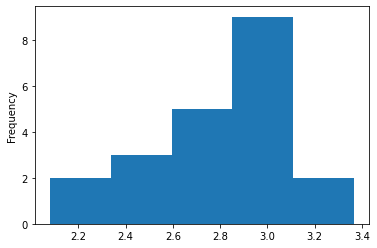

In [30]:
df['log_DT'].plot.hist(bins = 5)

In [31]:
#Unit Vector Scaler / Normalizer
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm = 'l2')					
# norm = 'l2' is default

df_scaled[col_names] = scaler.fit_transform(features.values)
df_scaled


,Delivery Time,Sorting Time
0,0.902861,0.429934
1,0.958798,0.284088
2,0.956820,0.290680
3,0.936329,0.351123
4,0.945373,0.325991
5,0.931377,0.364056
6,0.938343,0.345705
7,0.953583,0.301131
8,0.873005,0.487712
9,0.901523,0.432731


In [32]:
#Custom Transform
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log2, validate = True)

df_scaled[col_names] = transformer.transform(features.values)
df_scaled



,Delivery Time,Sorting Time
0,4.392317,3.321928
1,3.754888,2.000000
2,4.303781,2.584963
3,4.584963,3.169925
4,4.857981,3.321928
5,3.940167,2.584963
6,4.247928,2.807355
7,3.247928,1.584963
8,4.161888,3.321928
9,4.228819,3.169925


###### Model Predictions

In [33]:
# Manual prediction for say sorting time 5
delivery_time = (6.582734) + (1.649020)*(5)
delivery_time


14.827834

In [34]:
# Automatic Prediction for say sorting time 5, 8
new_data=pd.Series([5,8])
new_data


0    5
1    8
dtype: int64

In [35]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred


,sorting_time
0,5
1,8


In [36]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64